# Lecture 5

## Finite difference methods for the wave equation

The wave equation is a partial differential equation (PDE):

$$
\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}
$$

We will consider the time and space domains:
$t\in[0, T]$, $x \in [0, L]$.

* The wave equation is a hyperbolic PDE, so recursive methods are ok.
* The solutions are waves that can be written as $u(x+ct)$ and $u(x-ct)$.

The two derivatives in space require two boundary conditions

### Dirichlet (Fixed end)

$$
u(0, t) = u(L, t) = 0
$$

The wave will be reflected, but $u$ will change sign. A nonzero Dirichlet condition is also possible, but will not be considered here.

### Neumann (Loose end)

$$
\frac{\partial u}{\partial x}(0, t) = \frac{\partial u}{\partial x}(L, t) = 0
$$

The wave will be reflected without change in sign. A nonzero Neumann condition is also possible, but will not be considered here.

### Open boundary (No end)

$$
\frac{\partial u(0, t)}{\partial t} - c \frac{\partial u(0, t)}{\partial x}=0
$$
$$
\frac{\partial u(L, t)}{\partial t} + c \frac{\partial u(L, t)}{\partial x}=0
$$

The wave will simply pass undisturbed and unreflected through an open boundary.

The following example illustrates nicely. Turn on Pulse, and turn off damping. Specify one of the three boundary conditions and press the green pulse button.


In [1]:
from IPython.display import IFrame
IFrame("https://phet.colorado.edu/sims/html/wave-on-a-string/latest/wave-on-a-string_all.html", width=600, height=400)

The two derivatives in time also require two conditions, but these are both set at $t=0$ since the PDE is hyperbolic

$$
u(x, t=0) = I(x) \quad \text{and} \quad
\frac{\partial u}{\partial t}(x, t=0) = V(x)
$$

for some functions $I(x)$ and $V(x)$.

## Discretization

The simplest possible discretization is uniform in time and space

$$
t_n = n \Delta t, \quad n = 0, 1, \ldots, N_t
$$

$$
x_j = j \Delta x, \quad j = 0, 1, \ldots, N
$$

Hence the computational mesh is a grid like shown below

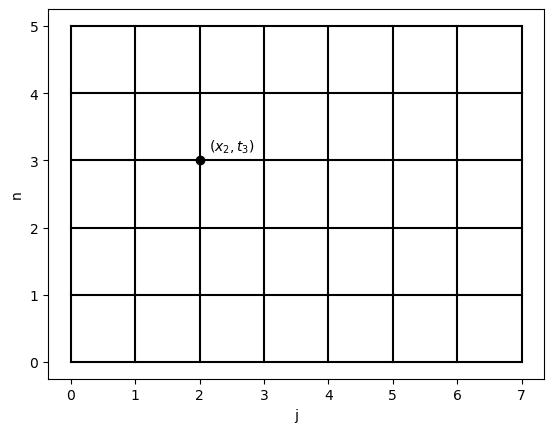

In [2]:
import numpy as np
import matplotlib.pyplot as plt
T = 5
L = 7
for i in range(T+1):
    plt.plot((0, L), (i, i), 'k')
for j in range(L+1):
    plt.plot((j, j), (0, T), 'k')
plt.xlabel('j')
plt.ylabel('n')
plt.plot(2, 3, 'ko')
plt.text(2.15, 3.15, '$(x_2, t_3)$');

A mesh function is defined as 

$$
u^n_j = u(x_j, t_n)
$$

and the mesh function has one value at each node in the mesh. For simplicity in later algorithms we will use the vectors

$$
u^n = \{u^n_0, u^n_1, \ldots, u^n_N\}
$$

which is the solution vector at time $t_n$.

A second order accurate discretization of the wave equation is

$$
\frac{u^{n+1}_j - u^n_j + u^{n-1}_j}{\Delta x^2} = c^2 \frac{u^n_{j+1}-2 u^{n}_j + u^n_{j-1}}{\Delta t^2}
$$

This stencil makes use of 5 neighbouring points

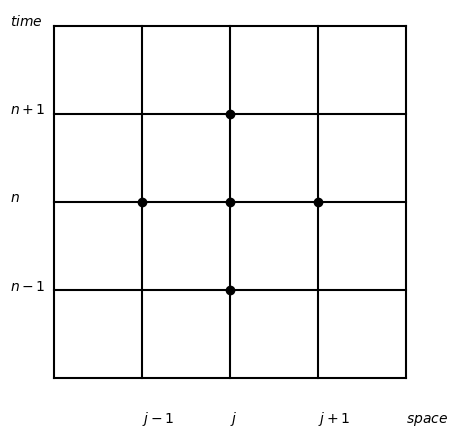

In [3]:
fig = plt.figure(figsize=(5, 5))
for i in range(5):
    plt.plot((0, 4), (i, i), 'k')
for j in range(5):
    plt.plot((j, j), (0, 4), 'k')
plt.plot(2, 2, 'ko')
plt.plot(2, 1, 'ko')
plt.plot(2, 3, 'ko')
plt.plot(1, 2, 'ko')
plt.plot(3, 2, 'ko')
ax = fig.gca()
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.axis('off')
ax.axis('equal')
plt.text(1, -0.5, '$j-1$')
plt.text(2, -0.5, '$j$')
plt.text(3, -0.5, '$j+1$')
plt.text(-0.5, 1, '$n-1$')
plt.text(-0.5, 2, '$n$')
plt.text(-0.5, 3, '$n+1$')
plt.text(-0.5, 4, '$time$')
plt.text(4, -0.5, '$space$');

The recursive solution algorithm is basically to solve the discrete PDE for all $u^{n+1}_j$

1. Initialize $u^0$ and $u^1$

2. for n in range(1, $N_t-1$):
    - for j in range(1, N-1):
        - $u^{n+1}_j = 2u^n_j - u^{n-1}_j + \left(\frac{c \Delta t}{ \Delta x}\right)^2 (u^{n}_{j+1}-2u^n_{j} + u^n_{j-1})$
        
and apply the chosen boundary conditions.

Since the solution algorithm is recursive we only need to store the solution at three time steps,

$$
u^{n+1}, u^n, u^{n-1}
$$

Each vector requires storage of $N+1$ number, so the total storage requirement for the method is merely $3(N+1)$.

The unknown vector is $u^{n+1}$, whereas $u^n$ and $u^{n-1}$ are always known.

The number

$$
\underline{c} = \frac{c \Delta t}{\Delta x}
$$

is the Courant number. The value of the Courant number is very important for the stability of the numerical scheme.

We may now use the second differentiation matrix to simplify the notation. We use

$$
D^{(2)} = \begin{bmatrix}
-2 & 1 & 0 & 0  & 0 & 0 & 0 & 0  \\
1 & -2 & 1 & 0 & 0 & 0 & 0 & \cdots \\
0 & 1 & -2 & 1 & 0 & 0 & 0 & \cdots \\
\vdots & & & \ddots &  & & &\cdots \\
\vdots & 0 & 0 & 0 &  1& -2& 1& 0 \\
\vdots & 0 & 0& 0& 0& 1& -2& 1 \\
0 & 0 & 0 & 0  & 0 & 0 & 1 & -2 \\
\end{bmatrix}
$$

which does not include $\Delta x$. We may now simply write the recursive formula as

For $n=(1, 2, \ldots, N_t-1)$ compute

$$
u^{n+1} = 2u^n-u^{n-1} + \underline{c}^2 D^{(2)} u^n
$$

Note how the $j$'th row of the matrix vector product $D^{(2)} u^{n}$ is given as

$$
(D^{(2)} u^n)_j = \sum_{i=0}^N d^{(2)}_{ji} u^n_{i} = u^n_{j+1}-2u^n_j+u^n_{j-1}
$$

except for the first and last rows where $j=0$ and $j=N$, respectively. However, these rows will be used for boundary conditions and will as such always require modification. For all inner points the above recursive equation is ok.


Note how the algorithm now basically can be written with merely one single for loop

1. Initialize $u^0, u^1$
2. For $n = 1, 2, \ldots N_t-1$ compute

$$
u^{n+1} = 2u^n-u^{n-1} + \underline{c}^2 D^{(2)} u^n
$$

Hence the use of matrix and vector notation simplifies the algorithm and as such also the implementation. However, in addition to the two simple steps above there is also boundary conditions. Boundary conditions are usually the most tricky part of numerical PDE solvers.

The complete algorithm will also need to update vectors as we move the solution forward:

1. Initialize $u^0, u^1$
2. For $n = 1, 2, \ldots N_t-1$ compute

$$
\begin{align*}
u^{n+1} &= 2u^n-u^{n-1} + \underline{c}^2 D^{(2)} u^n \\
\text{Apply} &\text{ boundary conditions} \\
u^{n-1} &\leftarrow u^n\\
u^{n} &\leftarrow u^{n+1}
\end{align*}
$$

We swap $u^{n-1} \leftarrow u^n$ and $u^{n} \leftarrow u^{n+1}$ to get ready for the next time step.

## Remaining complications

1. How to fix initial conditions in time?
2. How to set boundary conditions in space?
3. Implementation

At the end of the notebook there is implemented a class `Wave1D` that will be used to solve the wave equation. The solver has implemented only the simplest Dirichlet boundary condition and it is an assignment to implement the other possibilities. The reader is advised to study the details of the class.

For the implementation we define three vectors in Python to hold the solutions at $u^{n+1}, u^n$ and $u^{n-1}$

In [4]:
N = 100 # The spatial discretization
unp1 = np.zeros(N+1)
un   = np.zeros(N+1)
unm1 = np.zeros(N+1)

## Initial conditions

Initial conditions will need to fix `un` and `unm1`. There are basically two options. If a time dependent function is given for initial conditions, then this function may be used for not only one, but two time steps, at 

$$
u(x, t=0) \quad \text{and} \quad u(x, t=\Delta t)
$$

We will in the implementation then set `unm1`=$u(x, 0)$ and `un`=$u(x, \Delta t)$ simply by evaluation.

The other alternative is to use the actual condition $\frac{\partial u}{\partial t}=V(x)$. In order to implement this with a central scheme and second order accuracy, we use

$$
\frac{\partial u}{\partial t} = \frac{u^1-u^{-1}}{2 \Delta t} = V
$$

and then we use this equation to solve for the "unknown" $u^{-1}$ such that

$$
u^{-1} = u^1 - 2 V \Delta t
$$

This can further be used in the wave PDE at initial time step $n=0$, which is

$$
u^1 = 2u^0 - u^{-1} + \underline{c}^2 D^{(2)}u^0
$$

Insert for $u^{-1}$ and obtain a modified equation for $u^1$

$$
u^1 = u^0 + \frac{\underline{c}^2}{2}D^{(2)}u^0 + V \Delta t
$$

So with Neumann boundary conditions we initialize `unm1`$=u^0=u(x, 0)$ and `un`$=u^1=u(x, \Delta t)$ and solve first for `unp1`$=u^2=u(x, 2\Delta t)$.

The implementation in `Wave1D` simply evaluates a Sympy function for the initial condition. See the initial part of `Wave1D.__call__`.


## Boundary conditions

There are several options for the boundary conditions to the spatial domain.

1. Dirichlet
2. Neumann
3. Open boundaries
4. Periodic boundaries

We have seen the first three initially in these notes. We will now look at the implementation details. 

We will implement the entire solver using

```python
for n in range(2, Nt+1):
    unp1[:] = 2*un - unm1 + C**2 * (D @ un)
    apply_bcs(bc)
    unm1[:] = un
    un[:] = unp1
```
where `C` is the Courant number, `D` is the $D^{(2)}$ matrix (without scaling) and `apply_bcs` is a function used to fix the boundary values after solving. 

Note that `D @ un` represents the matrix vector product

$$
\begin{bmatrix}
-2 & 1 & 0 & 0  & 0 & 0 & 0 & 0  \\
1 & -2 & 1 & 0 & 0 & 0 & 0 & \cdots \\
0 & 1 & -2 & 1 & 0 & 0 & 0 & \cdots \\
\vdots & & & \ddots &  & & &\cdots \\
\vdots & 0 & 0 & 0 &  1& -2& 1& 0 \\
\vdots & 0 & 0& 0& 0& 1& -2& 1 \\
0 & 0 & 0 & 0  & 0 & 0 & 1 & -2 \\
\end{bmatrix}
\begin{bmatrix}
u^n_0 \\
u^n_1 \\
u^n_2 \\
\vdots \\
u^{n}_{N-2} \\
u^n_{N-1} \\
u^n_{N}
\end{bmatrix}
$$

and the result is multiplied by the scalar value $C^2$.

### Dirichlet

Dirichlet boundary conditions specifies fixed values at the edges of the domain. If both are zero, then we fix

$$
u^{n+1}_0 = 0 \quad u^{n+1}_{N} = 0
$$

which is implemented in the function `Wave1D.apply_bcs` at each time step as

In [5]:
unp1[0] = 0
unp1[-1] = 0

Note that since we specify $u^{n+1}_0$ and $u^{n+1}_N$ after solving for all the internal nodes, it does not matter what is in the first and last row of $D^{(2)}$. Whatever is computed for $j=0$ and $j=N$ with

$$
u^{n+1} = 2u^n-u^{n-1} + \underline{c}^2 D^{(2)} u^n
$$

will be overwritten by specifying $u^{n+1}_0 = u^{n+1}_{N} = 0$. 

For Dirichlet the algorithm is 

1. Initialize $u^0, u^1$
2. For $n = 1, 2, \ldots N_t-1$ compute

$$
\begin{align*}
u^{n+1} &= 2u^n-u^{n-1} + \underline{c}^2 D^{(2)} u^n \\
u^{n+1}_0 &= u^{n+1}_N = 0 \\
u^{n-1} &\leftarrow u^n\\
u^{n} &\leftarrow u^{n+1}
\end{align*}
$$

If the PDE is only used for initial points $j=1, 2, \ldots, N-1$, then it is not necessary to set $u^{n+1}_0 = u^{n+1}_N = 0$ every time step. It is sufficient to fix them at the start of the simulation.

### Neumann

Neumann is a bit more tricky. For simplicity we assume homogeneous conditions, such that 

$$
\frac{\partial u}{\partial x}(0, t) = \frac{\partial u}{\partial x}(L, t) = 0 
$$

If we now apply central differences of second order, then the stencil is

$$
\frac{\partial u}{\partial x} = \frac{u^{n}_{j+1}-u^{n}_{j-1}}{2 \Delta x}
$$

for any time step $n \in (0, 1, \ldots, N)$. At the left boundary $j=0$ and we get

$$
\frac{\partial u}{\partial x} = \frac{u^{n}_{1}-u^{n}_{-1}}{2 \Delta x} = 0
$$

Here $u^{n}_{-1}$ is not known, or it is outside the mesh. However, we get from the above equation that

$$
u^{n}_{-1} = u^{n}_{1}
$$

and this can be used together with the PDE for the wave equation 

$$
u^{n+1}_j = 2u^n_j - u^{n-1}_j + \underline{c}^2 (u^{n}_{j+1}-2u^n_{j} + u^n_{j-1})
$$

This equation at node 0 is

$$
u^{n+1}_0= 2u^{n}_0 - u^{n-1}_0 + \underline{c}^2 (u^{n}_{1}-2 u^{n}_0 + u^{n}_{-1})
$$

where we can insert for $u^{n}_{-1} = u^{n}_{1}$ and get

$$
u^{n+1}_0= 2u^{n}_0 - u^{n-1}_0 + \underline{c}^2 (2u^{n}_{1}-2 u^{n}_0)
$$

Similarily, at the last node $j=N$ and 

$$
u^{n+1}_N= 2u^{n}_N - u^{n-1}_N + \underline{c}^2 (2u^{n}_{N-1}-2 u^{n}_N)
$$

In order to get this into a vector notation we can modify the first and last rows of the matrix $D^{(2)}$:

$$
D^{(2)}_N = \begin{bmatrix}
-2 & 2 & 0 & 0  & 0 & 0 & 0 & 0  \\
1 & -2 & 1 & 0 & 0 & 0 & 0 & \cdots \\
0 & 1 & -2 & 1 & 0 & 0 & 0 & \cdots \\
\vdots & & & \ddots &  & & &\cdots \\
\vdots & 0 & 0 & 0 &  1& -2& 1& 0 \\
\vdots & 0 & 0& 0& 0& 1& -2& 1 \\
0 & 0 & 0 & 0  & 0 & 0 & 2 & -2 \\
\end{bmatrix}
$$

Now the following equation will be valid for all nodes, and not just the internal:

$$
u^{n+1} = 2u^n-u^{n-1} + \underline{c}^2 D_N^{(2)} u^n
$$

There is in other words no need to do anything for these Neumann conditions in the `Wave1D.apply_bcs` method. Modifying the matrix is all that it takes.

### Open boundaries

At the left boundary we have the open condition

$$
\frac{\partial u}{\partial t} - c \frac{\partial u}{\partial x} =0
$$

A simple solution here is to use first order accurate forward differences

$$
\frac{u^{n+1}_0 - u^n_0}{\Delta t} - c \frac{u^n_1-u^n_0}{\Delta x} = 0
$$

This equation can be solved for $u^{n+1}_0$, which is exactly what we need at the boundary. Hence we directly have an equation to use

$$
u^{n+1}_0 = u^n_0 + \underline{c} (u^n_1-u^n_0)
$$

Similarily at the other boundary we have

$$
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} =0
$$

and the same first order approach gives us

$$
u^{n+1}_N = u^n_N + \underline{c} (u^n_{N-1}-u^n_N)
$$

Unfortunately the accuracy is only first order. Like for Neumann conditions we can also here use the wave PDE in order to get better accuracy. Using central second order stencils we get for $j=0$

$$
\frac{u^{n+1}_0 - u^{n-1}_0}{ 2\Delta t} - c \frac{u^n_1-u^n_{-1}}{ 2 \Delta x} = 0
$$

This equation can be solved for the unknown $u^n_{-1}$

$$
u^n_{-1} = u^n_1 - \frac{1}{\underline{c}}(u^{n+1}_0-u^{n-1}_0)
$$

which can be used in the PDE for node $j=0$

$$
u^{n+1}_0= 2u^{n}_0 - u^{n-1}_0 + \underline{c}^2 (u^{n}_{1}-2 u^{n}_0 + u^{n}_{-1})
$$

Some algebra leads to

$$
u^{n+1}_0 = 2(1-\overline{c})u^n_0 - \frac{1-\underline{c}}{1+\underline{c}}u^{n-1}_0 + \frac{2 \underline{c}^2}{1+\underline{c}}u^n_1
$$

A similar approach for $j=N$ leads to 

$$
u^{n+1}_N = 2(1-\overline{c})u^n_N - \frac{1-\underline{c}}{1+\underline{c}}u^{n-1}_N + \frac{2 \underline{c}^2}{1+\underline{c}}u^n_{N-1}
$$

These two equations should be implemented in the `Wave1D.apply_bcs` method.

### Periodic boundaries

If a domain is periodic, this simply means that a solution is repeating itself indefinitely. For example, a sine wave is periodic. The wave $\sin(2 x \pi)$ is repeating itself every $x=1, 2, 3, \ldots$ as shown below. 


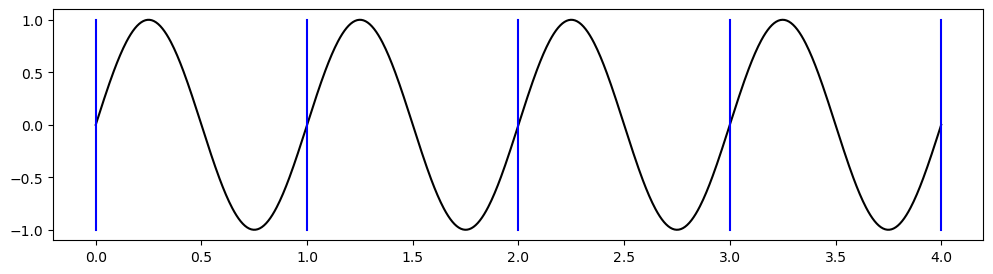

In [6]:
x = np.linspace(0, 4, 800)
fi = plt.figure(figsize=(12, 3))
plt.plot(x, np.sin(2*x*np.pi), 'k')
for i in range(5):
    plt.plot((i, i), (-1, 1), 'b')

![tikz](periodic.png)

Periodic boundary conditions simply mean that $u(0, t) = u(L, t)$. This means the two red dots above are the same and as such

$$
u^{n}_0 = u^n_{N}
$$

However, there is more. Because of the above, this means that $u^n_{-1}$, which earlier has been outside of the domain, now is simply $u^n_{N-1}$. The mesh wraps around. And as a consequence there is nothing out of the ordinary with $j=0$. We can use the central PDE stencil wrapped around. For $j=0$ we get 

$$
u^{n+1}_0 = 2u^{n}_0 - u^{n-1}_0 + \underline{c}^2 (u^n_1-2 u^n_0 + u^n_{N-1})
$$

So the matrix $D^{(2)}$ can be modified as

$$
D_p^{(2)} = \begin{bmatrix}
-2 & 1 & 0 & 0  & 0 & 0 & 1 & 0  \\
1 & -2 & 1 & 0 & 0 & 0 & 0 & \cdots \\
0 & 1 & -2 & 1 & 0 & 0 & 0 & \cdots \\
\vdots & & & \ddots &  & & &\cdots \\
\vdots & 0 & 0 & 0 &  1& -2& 1& 0 \\
\vdots & 0 & 0& 0& 0& 1& -2& 1 \\
0 & 0 & 0 & 0  & 0 & 0 & 1 & -2 \\
\end{bmatrix}
$$

and we can use the vector approach for $j=0, 1, \ldots, N-1$ and then in addition we can set $u^{n+1}_N = u^{n+1}_0$. 

Note that the last row in the matrix $D^{(2)}_p$ is not used, because we solve the PDE for $j=0, 1, \ldots, N-1$.

The condition $u^{n+1}_N = u^{n+1}_0$ should be set in `Wave1D.apply_bcs`.


## Wave equation solver

A basic solver implemented with Dirichlet boundary conditions is given below. The solver should be modified with Neumann, open and periodic boundary conditions. 

In [7]:
import numpy as np
import sympy as sp
from scipy import sparse
import matplotlib.pyplot as plt

x, t, c, L = sp.symbols('x,t,c,L')

class Wave1D:
    """Class for solving the wave equation

    Parameters
    ----------
    N : int
        Number of uniform spatial intervals
    L0 : number
        The extent of the domain, which is [0, L]
    c0 : number, optional
        The wavespeed
    cfl : number, optional
        CFL number
    u0 : Sympy function of x, t, c and L
        Used for specifying initial condition
    """
    def __init__(self, N, L0=1, c0=1, cfl=1, u0=sp.exp(-200*(x-L/2+c*t)**2)):
        self.N = N
        self.L = L0
        self.c = c0
        self.cfl = cfl
        self.x = np.linspace(0, L0, N+1)
        self.dx = L0 / N
        self.u0 = u0
        self.unp1 = np.zeros(N+1)
        self.un = np.zeros(N+1)
        self.unm1 = np.zeros(N+1)

    def D2(self, bc):
        """Return second order differentiation matrix

        Paramters
        ---------
        bc : int
            Boundary condition

        Note
        ----
        The returned matrix is not divided by dx**2
        """
        D = sparse.diags([1, -2, 1], [-1, 0, 1], (self.N+1, self.N+1), 'lil')
        if bc == 1: # Neumann condition is baked into stencil
            raise NotImplementedError

        elif bc == 3: # periodic (Note u[0] = u[-1])
            raise NotImplementedError

        return D

    def apply_bcs(self, bc, u=None):
        """Apply boundary conditions to solution vector

        Parameters
        ----------
        bc : int
            Boundary condition in space
            - 0 Dirichlet
            - 1 Neumann
            - 2 Open boundary
            - 3 periodic
        u : array, optional
            The solution array to fix at boundaries
            If not provided, use self.unp1

        """
        u = u if u is not None else self.unp1
        if bc == 0: # Dirichlet condition
            u[0] = 0
            u[-1] = 0

        elif bc == 1: # Neumann condition
            pass

        elif bc == 2: # Open boundary
            raise NotImplementedError

        elif bc == 3: # Periodic
            raise NotImplementedError

        else:
            raise RuntimeError(f"Wrong bc = {bc}")

    @property
    def dt(self):
        return self.cfl*self.dx/self.c

    def __call__(self, Nt, cfl=None, bc=0, ic=0, save_step=100):
        """Solve wave equation

        Parameters
        ----------
        Nt : int
            Number of time steps
        cfl : number
            Courant number
        bc : int, optional
            Boundary condition in space
            - 0 Dirichlet
            - 1 Neumann
            - 2 Open boundary
            - 3 periodic
        ic : int, optional
            Initial conditions
            - 0 Specify un = u(x, t=0) and unm1 = u(x, t=-dt)
            - 1 Specify un = u(x, t=0) and u_t(x, t=0) = 0
        save_step : int, optional
            Save solution every save_step time step

        Returns
        -------
        Dictionary with key, values as timestep, array of solution
        The number of items in the dictionary is Nt/save_step, and
        each value is an array of length N+1

        """
        D = self.D2(bc)
        self.cfl = C = self.cfl if cfl is None else cfl
        dt = self.dt
        
        # Initialize
        u0 = sp.lambdify(x, self.u0.subs({L: self.L, c: self.c, t: 0}))
        self.unm1[:] = u0(self.x) # unm1 = u(x, 0)
        plotdata = {0: self.unm1.copy()}
        if ic == 0: # use sympy function for un = u(x, dt)
            u0 = sp.lambdify(x, self.u0.subs({L: self.L, c: self.c, t: dt}))
            self.un[:] = u0(self.x)

        else: # use u_t = 0 for un = u(x, dt)
            self.un[:] = self.unm1 + 0.5*C**2* (D @ self.unm1)
            self.apply_bcs(bc, self.un)
        if save_step == 1:
            plotdata[1] = self.un.copy()

        # Solve 
        for n in range(2, Nt+1):
            self.unp1[:] = 2*self.un - self.unm1 + C**2 * (D @ self.un)
            self.apply_bcs(bc)
            self.unm1[:] = self.un
            self.un[:] = self.unp1
            if n % save_step == 0: # save every save_step timestep
                plotdata[n] = self.unp1.copy()

        return plotdata
    
    def plot_with_offset(self, data):
        Nd = len(data)
        v = np.array(list(data.values()))
        t = np.array(list(data.keys()))
        dt = t[1]-t[0]
        v0 = abs(v).max()
        fig = plt.figure(facecolor='k')
        ax = fig.add_subplot(111, facecolor='k')
        for i, u in data.items():
            ax.plot(self.x, u+i*v0/dt, 'w', lw=2, zorder=i)
            ax.fill_between(self.x, u+i*v0/dt, i*v0/dt, facecolor='k', lw=0, zorder=i-1)
        plt.show()


Let us try the solver for an initial pulse $u(x, t) = \exp(-200(x-L/2+ct)^2)$. We choose 100 time steps with a Courant (CFL) number of unity. Also, we store the result of the simulation avery 10'th time step and plot 10 solutions with offset in the same figure. Notice that the solution flips sign when it reaches the boundaries.

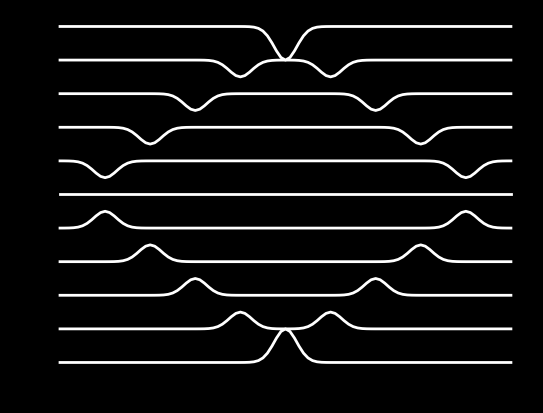

In [8]:
sol = Wave1D(100, cfl=1, L0=2, c0=1)
data = sol(100, cfl=1, bc=0, save_step=10, ic=1)
sol.plot_with_offset(data)